# Life Expectancy

## Scope of the Project

### Goals
* Describe the dependence of Life expetancy on the other numerical factors by Country
* Is life expectancy/GDP increasing over the years?
* Do the pct changes in GDP follow any particular distribution?
* Are there any momentum effects on the GDP's?
* We can expect that the global financial crisis of 2008 had an effect on the countries GDP. Did the crisis induce any effects on the life expectancy on any of the countries?

## Imports

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Data

### Imports and Adjustments

In [124]:
data = pd.read_csv('all_data.csv')
print(data.head())
# Normalize GDP to order 10bn
data['GDP_bnnorm'] = data['GDP'].map(lambda x: x/(10**10))
# Handle the large orders of magnitude with log
data['GDP_lognorm'] = data['GDP'].map(lambda x: np.log10(x))

# Simplify name of Life expectancy column
data.rename(columns={'Life expectancy at birth (years)':'Life'}, inplace=True)

# Simplify name of the United States
data['Country'] = data['Country'].map(lambda x: 'US' if x == 'United States of America' else x)
print(data.head())

data_dict = {country: data[data['Country'] == country].drop(columns=['Country'], axis=1) for country in data.Country.unique()}

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
  Country  Year  Life           GDP  GDP_bnnorm  GDP_lognorm
0   Chile  2000  77.3  7.786093e+10    7.786093    10.891320
1   Chile  2001  77.3  7.097992e+10    7.097992    10.851136
2   Chile  2002  77.8  6.973681e+10    6.973681    10.843462
3   Chile  2003  77.9  7.564346e+10    7.564346    10.878771
4   Chile  2004  78.0  9.921039e+10    9.921039    10.996557


### Exploration

We start with a quick comparison of the GDP and Life expetancy for each country

In [125]:
for k, v in data_dict.items():
    print(k)
    print(v[['Life', 'GDP_bnnorm']].describe())
    print(' ')

Chile
            Life  GDP_bnnorm
count  16.000000   16.000000
mean   78.943750   16.978885
std     1.058911    7.687884
min    77.300000    6.973681
25%    77.975000    9.387303
50%    79.000000   17.299750
75%    79.825000   24.495150
max    80.500000   27.838400
 
China
            Life   GDP_bnnorm
count  16.000000    16.000000
mean   74.262500   495.771375
std     1.318016   350.109579
min    71.700000   121.135000
25%    73.400000   188.158500
50%    74.450000   407.519500
75%    75.250000   781.955000
max    76.100000  1106.470000
 
Germany
           Life  GDP_bnnorm
count  16.00000   16.000000
mean   79.65625  309.477562
std     0.97500   66.748625
min    78.00000  194.995000
25%    78.95000  274.087000
50%    79.85000  339.635000
75%    80.52500  359.607750
max    81.00000  389.061000
 
Mexico
            Life  GDP_bnnorm
count  16.000000   16.000000
mean   75.718750   97.665063
std     0.620987   20.957165
min    74.800000   68.364800
25%    75.225000   76.309100
50%    75.

<Axes: xlabel='GDP_bnnorm', ylabel='Count'>

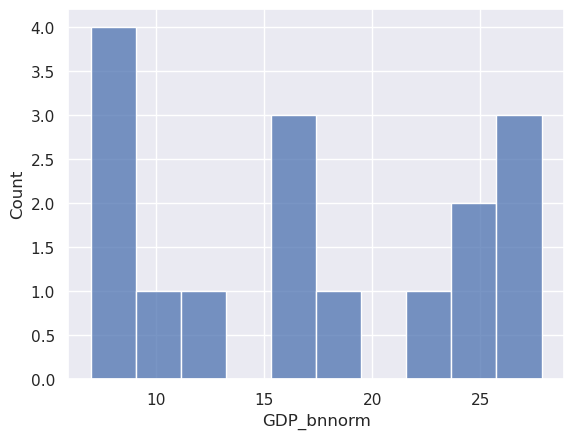

In [118]:
sns.histplot(data=data[data['Country'] == 'Chile'].GDP_bnnorm, bins=10)

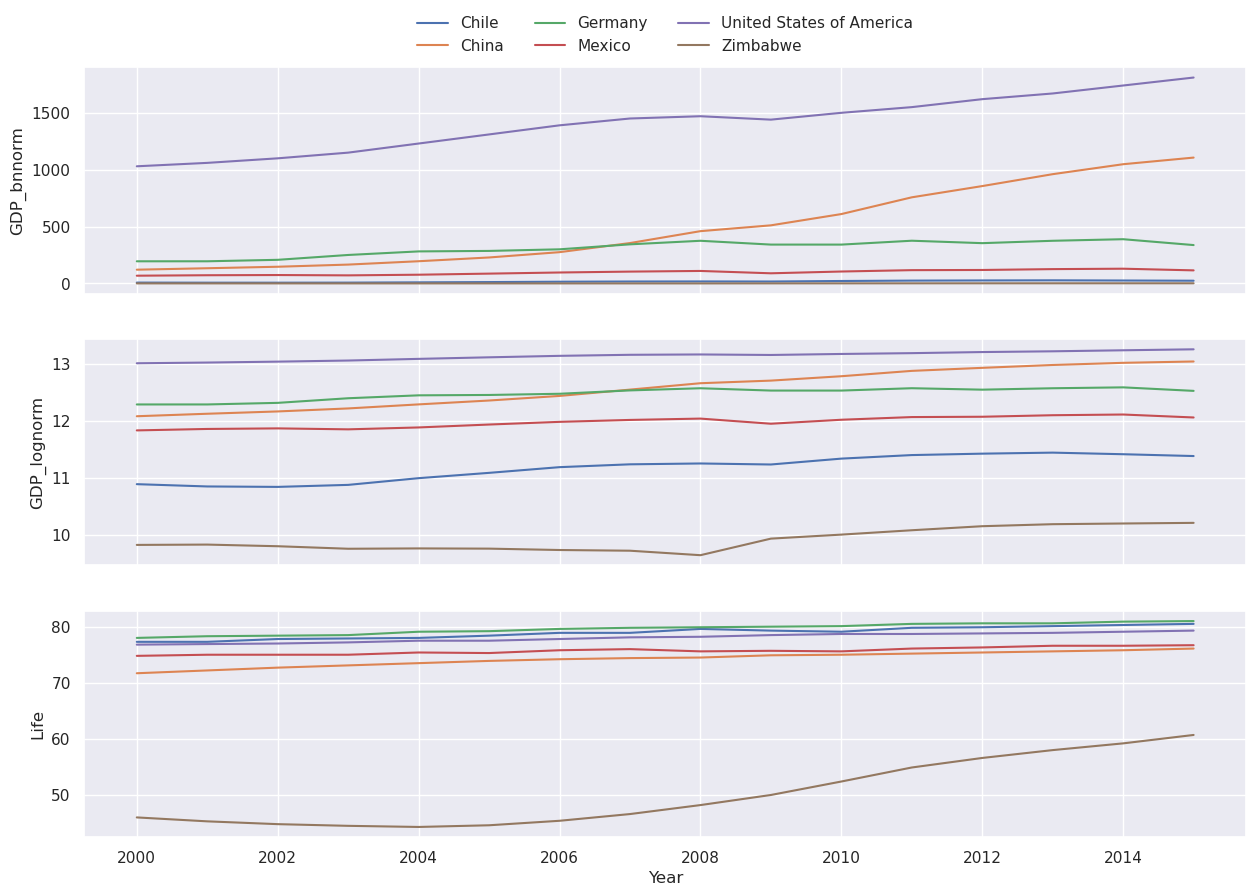

<Figure size 640x480 with 0 Axes>

In [100]:
fig, ax = plt.subplots(3,1, figsize=(15,10), sharex=True, sharey=False)

sns.lineplot(data=data, ax=ax[0], x="Year", y="GDP_bnnorm", hue="Country")
sns.move_legend(ax[0], 'lower center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
sns.lineplot(data=data, ax=ax[1], x="Year", y="GDP_lognorm", hue="Country", legend=False)
sns.lineplot(data=data, ax=ax[2], x="Year", y="Life", hue='Country', legend=False)
plt.show()
plt.clf()

<Axes: xlabel='Year', ylabel='GDP_bnnorm'>

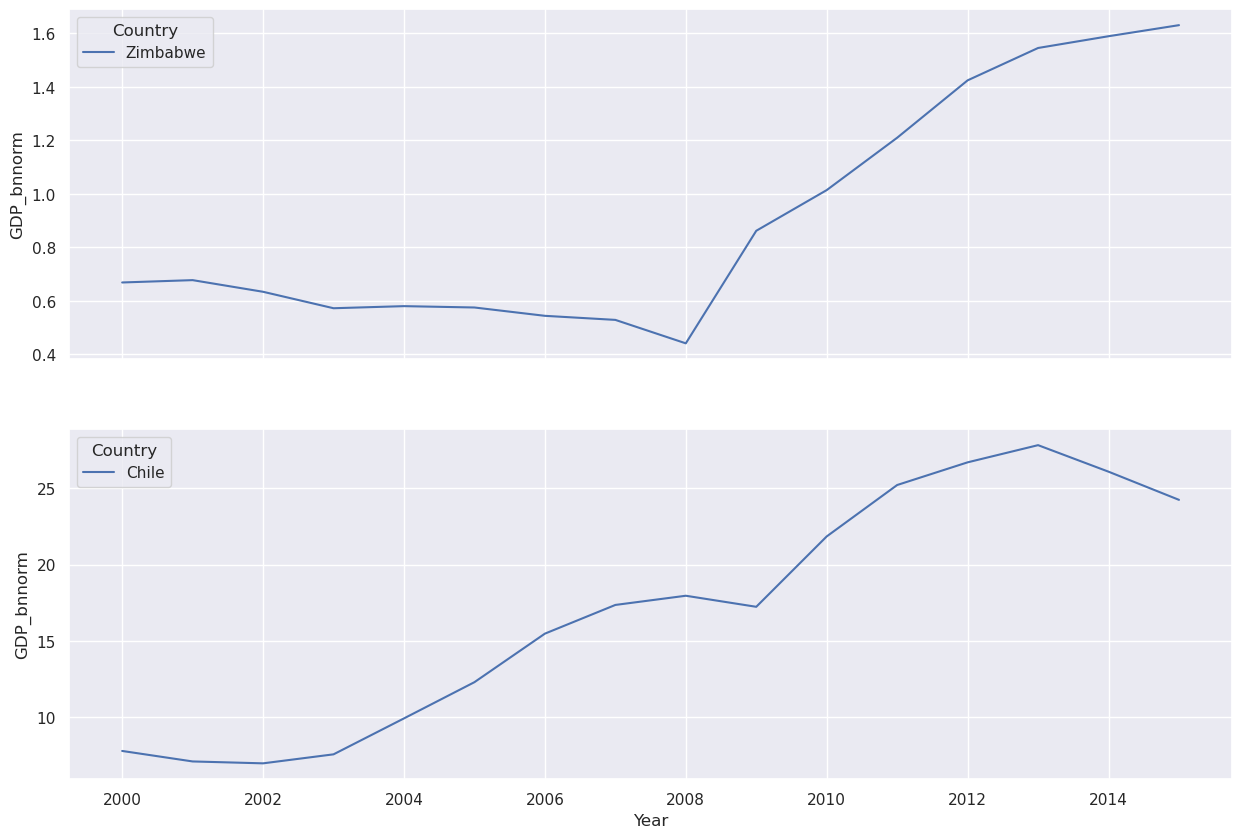

In [105]:
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True, sharey=False)

sns.lineplot(data=data[data['Country'].isin(['Zimbabwe'])], ax=ax[0], x="Year", y="GDP_bnnorm", hue="Country")
sns.lineplot(data=data[data['Country'].isin(['Chile'])], ax=ax[1], x="Year", y="GDP_bnnorm", hue="Country")

Unsurprisingly, the United States, with China catching up, dominate the other countries in GDP, while countries like Zimbabwe and Chile seem to barely improve in GDP over time at all. In the top plot, which shows the evolution of GDP in units of 10bn$, it is difficult to tell if there even is a change in GDP for the poorest countries. The second plot from the top shows essentially the order of magnitude of the GDP's for the different countries, and we see that the GDP's are distributed more or less over three orders of magnitude. However, it is still difficult to tell what happens for the poorest countries.

Also, life expectancy is very similar for all countries except Zimbabwe, which despite a significant improvement over years still lags after the other countries. Initially, one might imagine that there is a correlation between GDP and life expectancy, but certainly in the case of Zimbabwe this doesn't seem to hold. Next, let's investigate this correlation more closely with a scatterplot.

<Axes: xlabel='GDP', ylabel='Life'>

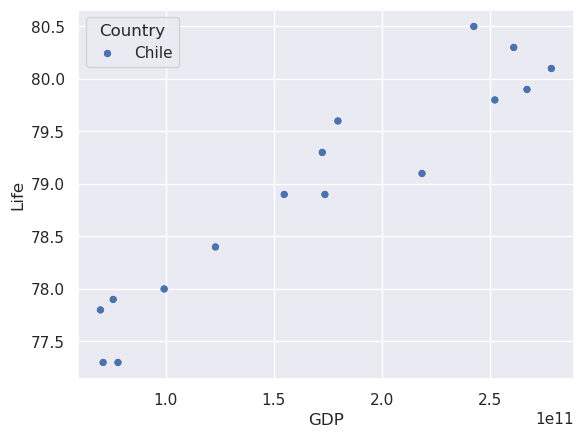

In [107]:
sns.scatterplot(data=data[data['Country'] == 'Chile'], y='Life', x='GDP', hue='Country')

In [61]:
for country in data['Country'].unique():
    print(country)
    print(data[data['Country'] == country][['GDP', 'Life']].corr())
    print(' ')

Chile
           GDP      Life
GDP   1.000000  0.949877
Life  0.949877  1.000000
 
China
           GDP      Life
GDP   1.000000  0.908526
Life  0.908526  1.000000
 
Germany
           GDP      Life
GDP   1.000000  0.932699
Life  0.932699  1.000000
 
Mexico
           GDP      Life
GDP   1.000000  0.932238
Life  0.932238  1.000000
 
United States of America
           GDP      Life
GDP   1.000000  0.981709
Life  0.981709  1.000000
 
Zimbabwe
         GDP    Life
GDP   1.0000  0.9662
Life  0.9662  1.0000
 


In [116]:
for k, v in data_dict.items():
    print(k, v.GDP.pct_change().dropna().describe())
    print()

Chile count    15.000000
mean      0.086292
std       0.134220
min      -0.088376
25%      -0.028933
50%       0.058949
75%       0.196854
max       0.311553
Name: GDP, dtype: float64

China count    15.000000
mean      0.160958
std       0.072367
min       0.055550
25%       0.108500
50%       0.130471
75%       0.198896
max       0.294476
Name: GDP, dtype: float64

Germany count    15.000000
mean      0.040934
std       0.089659
min      -0.132370
25%       0.000045
50%       0.049290
75%       0.095250
max       0.205176
Name: GDP, dtype: float64

Mexico count    15.000000
mean      0.039652
std       0.093715
min      -0.187356
25%       0.018208
50%       0.060054
75%       0.097600
max       0.174514
Name: GDP, dtype: float64

United States of America count    15.000000
mean      0.038514
std       0.021666
min      -0.020408
25%       0.032099
50%       0.041667
75%       0.045308
max       0.069565
Name: GDP, dtype: float64

Zimbabwe count    15.000000
mean      0.083175
std   

#### Post financial crisis in 2008